In [167]:
import numpy as np
import matplotlib.pyplot as plt
import gyrator

In [22]:
ubgyrator = gyrator.ubgyrator
potgrid = gyrator.generate_potential_grid
angm = gyrator.angularmomentum

In [198]:
%time
ini = [.0, 1.0, 0., 1.]
k = 10.0
m = 1.0
T = [5000.0, 0.01]
# eta = 1.0
eta = .0
alpha = 10.0
dt = 0.001
nsteps = 50000
trajectory,A,B = ubgyrator(k, alpha, m, T,eta, ini, dt, nsteps)
L = angm(trajectory)
time = np.arange(0,nsteps*dt,dt)

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 5.48 μs


In [199]:
# Determine plot limits based on trajectory with some padding
x_min, x_max = trajectory[:, 0].min(), trajectory[:, 0].max()
y_min, y_max = trajectory[:, 1].min(), trajectory[:, 1].max()
padding = 0.06
x_range = (x_min - 2*padding, x_max + 2*padding)
y_range = (y_min - padding, y_max + padding)

X, Y, Z = potgrid(k, alpha, x_range, y_range, 100)

def cuts(L, threshold=1):
    p_ind = np.where(L>=0)[0]
    n_ind = np.where(L<0)[0]
    p_cont = np.diff(p_ind)
    n_cont = np.diff(n_ind)
    p_cutt = list(p_ind[np.where(p_cont>threshold)[0]])
    p_cutt.extend(list(p_ind[np.where(p_cont>threshold)[0]+1]))
    p_cutt = np.sort(p_cutt)
    
    n_cutt = list(n_ind[np.where(n_cont>threshold)[0]])
    n_cutt.extend(list(n_ind[np.where(n_cont>threshold)[0]+1]))
    n_cutt = np.sort(n_cutt)
    
    return p_cutt, n_cutt

p_c, n_c = cuts(L,100)

In [200]:
x = trajectory[:, 0]
y = trajectory[:, 1]
px = trajectory[:, 2]
py = trajectory[:, 3]

Text(0, 0.5, '$L(t)$')

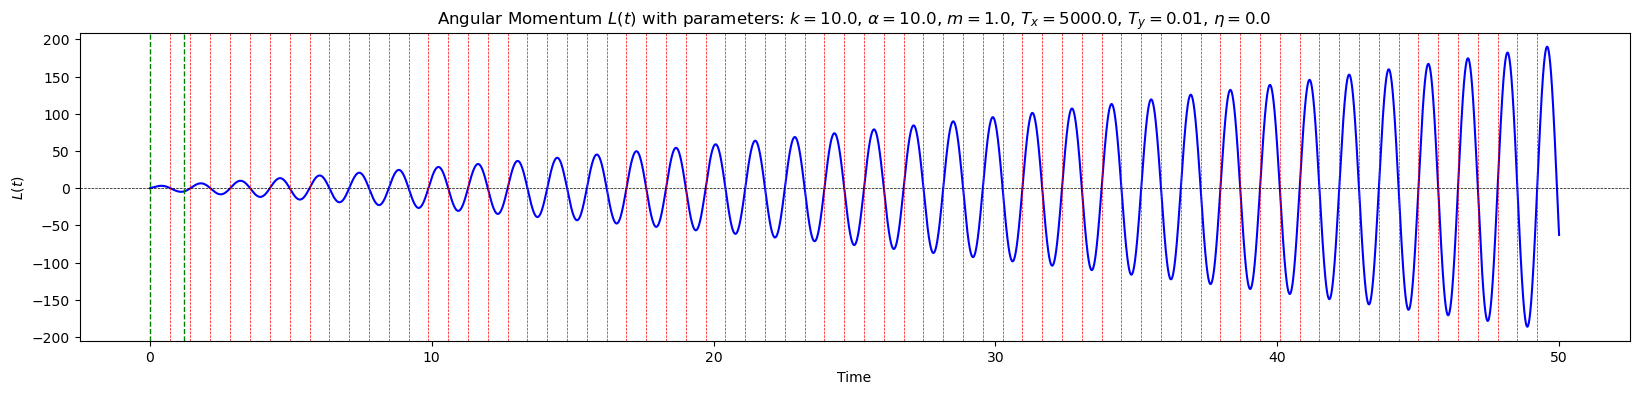

In [201]:
plt.figure(figsize=(20, 4))
plt.plot(time, L, color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--')
for i in p_c:
    # print(i)
    plt.axvline(time[i], color='red', lw=0.5, ls='--')
plt.axvline(time[p_ind[0]], color='green', lw=1, ls='--', label='First Positive Cut')
plt.axvline(time[1214], color='green', lw=1, ls='--', label='First Positive Cut')
plt.title(r'Angular Momentum $L(t)$ with parameters: $k=$'+str(k)+r', $\alpha=$'+str(alpha)+r', $m=$'+str(m)+r', $T_x=$'+str(T[0])+r', $T_y=$'+str(T[1])+r', $\eta=$'+str(eta))
plt.xlabel('Time')
plt.ylabel(r'$L(t)$')

Text(0.5, 1.0, 'Trajectory with parameters: $k=$10.0, $\\alpha=$10.0, $m=$1.0, $T_x=$5000.0, $T_y=$0.01, $\\eta=$0.0')

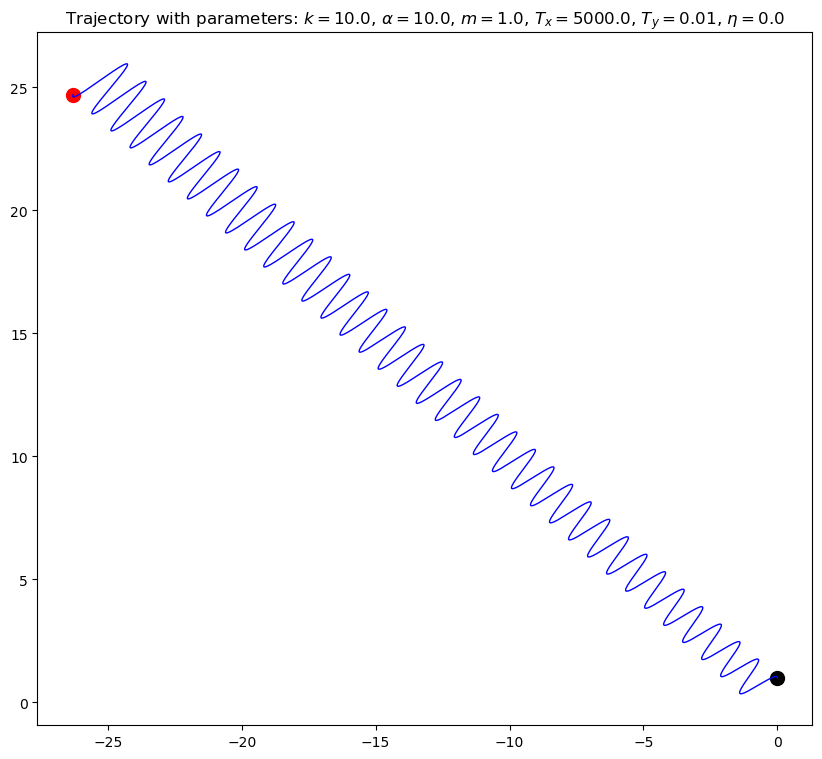

In [202]:
plt.figure(figsize=(10, 9))
# contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')
# plt.colorbar(contour, label='Potential U(x,y)')
plt.plot(trajectory[:, 0], trajectory[:, 1], color='blue', lw=1)
# for i in range(1,len(p_cutt),2):
#     print(p_cutt[i-1], p_cutt[i])
#     plt.plot(x[p_cutt[i-1]:p_cutt[i]], y[p_cutt[i-1]:p_cutt[i]], c='r', label='Segment '+str(i+1))
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='black', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', s=100, label='End')
plt.title(r'Trajectory with parameters: $k=$'+str(k)+r', $\alpha=$'+str(alpha)+r', $m=$'+str(m)+r', $T_x=$'+str(T[0])+r', $T_y=$'+str(T[1])+r', $\eta=$'+str(eta))
# plt.savefig("images/gyrator/udgyrator_trajectory_DTlarge_5_long.png", dpi=300)

(21, np.int64(24))